In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.	Data Collection

In [2]:
df=pd.read_csv(r"C:\Users\Harshal Malve\Documents\BIA -Class\Capstone project\Automobile\imports_85_data.csv",encoding='unicode_escape')


In [3]:
df.head()


,col2,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   col2                    164 non-null    float64
 1   Make_Car_Manufacturer   205 non-null    object 
 2   Fuel_Type               205 non-null    object 
 3   Aspiration              205 non-null    object 
 4   Number_of_Doors         205 non-null    object 
 5   Body_Style              205 non-null    object 
 6   Drive_Wheels            205 non-null    object 
 7   Engine_Location         205 non-null    object 
 8   Wheelbase_inches        205 non-null    float64
 9   Length_inches           205 non-null    float64
 10  Width_inches            205 non-null    float64
 11  Height_inches           205 non-null    float64
 12  Curb_Weight_pounds      205 non-null    int64  
 13  Engine_Type             205 non-null    object 
 14  Number_of_Cylinders     205 non-null    ob

##  2.	Data Preprocessing

In [5]:
df.isnull().sum()  #handling missing values

col2                      41
Make_Car_Manufacturer      0
Fuel_Type                  0
Aspiration                 0
Number_of_Doors            0
Body_Style                 0
Drive_Wheels               0
Engine_Location            0
Wheelbase_inches           0
Length_inches              0
Width_inches               0
Height_inches              0
Curb_Weight_pounds         0
Engine_Type                0
Number_of_Cylinders        0
EngineSize_cubicinches     0
Fuel_System                0
Bore_Ratio                 4
Stroke                     4
Compression_Ratio          0
Horsepower                 2
Peak_RPM                   2
City_MPG                   0
Highway_MPG                0
Price_Dollars              4
Coumn_Z                    0
dtype: int64

<Axes: >

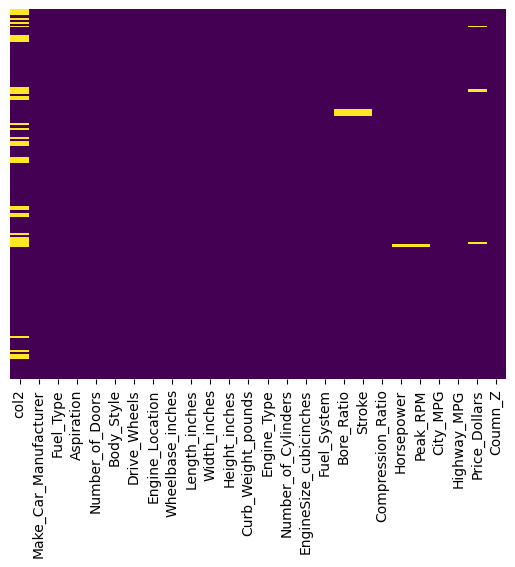

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [7]:
 df.drop('col2',axis=1,inplace=True)

In [8]:
print(df.columns)

Index(['Make_Car_Manufacturer', 'Fuel_Type', 'Aspiration', 'Number_of_Doors',
       'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Wheelbase_inches',
       'Length_inches', 'Width_inches', 'Height_inches', 'Curb_Weight_pounds',
       'Engine_Type', 'Number_of_Cylinders', 'EngineSize_cubicinches',
       'Fuel_System', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
       'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Price_Dollars',
       'Coumn_Z'],
      dtype='object')


In [9]:
#filling Null values of 'Price_Dollars' with avrage cost of vehicles with specific 'Number_of_Cylinders'
dfavg_price_series = df.groupby('Number_of_Cylinders')['Price_Dollars'].mean()

In [10]:
dfavg_price_series

Number_of_Cylinders
eight     38900.000000
five      22007.600000
four      10303.197452
six       23671.833333
three      5151.000000
twelve    36000.000000
two       13020.000000
Name: Price_Dollars, dtype: float64

In [11]:
def impute_Price(cols):
    Price_Dollars = cols[0]
    Number_of_Cylinders = cols[1]
    
    if pd.isnull(Price_Dollars):

        if Number_of_Cylinders == "eight":
            return 38900

        elif Number_of_Cylinders == "five":
            return 22007.60

        elif Number_of_Cylinders == "four":
            return 10303.19

        elif Number_of_Cylinders == "six":
            return 23671.83

        elif Number_of_Cylinders == "three":
            return 5151

        elif Number_of_Cylinders == "twelve":
            return 36000

        elif Number_of_Cylinders == "two":
            return 13020

    else:
        return Price_Dollars

In [12]:
df['Price_Dollars'] = df[['Price_Dollars','Number_of_Cylinders']].apply(impute_Price,axis=1)

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_10480\903743149.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Price_Dollars = cols[0]
C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_10480\903743149.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Number_of_Cylinders = cols[1]


<Axes: >

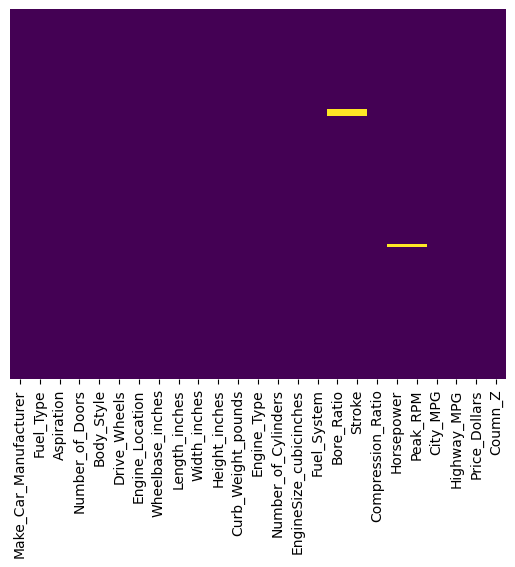

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
#Rotory engines defies the traditional bore and stroke conventions.                                                      
#but we can not keep the cell Empty hence we are using best way to fill it which is KNN Imputation (k-nearest neighbors).
#KNN Locates the k nearest data points (neighbors) based on similarity (usually Euclidean distance). - Checks their values for the missing feature. - 
#Takes an average (or weighted average) of those values.

from sklearn.impute import KNNImputer

In [15]:
imputer = KNNImputer(n_neighbors=20)  # Choose an appropriate value for 'n_neighbors'
imputed_values = imputer.fit_transform(df[['Bore_Ratio', 'Stroke']])  ## Fit and transform the imputer on your original DataFrame
df_imputed = pd.DataFrame(imputed_values, columns=['Bore_Ratio', 'Stroke'])   #The DataFrame is a fundamental data structure provided by the Pandas library in Python. 
df.update(df_imputed)

In [16]:
#Peak Rpm and Horsepower is also has some NaN values and if we take avrage of any parameters it could be "Engine size".
#but we can not take average parameters from Engine size as it is not catgorical hence decided to go with KNN Imputation 
#for Empty cells in Peak RPM and Horsepower.


imputed_values = imputer.fit_transform(df[['Peak_RPM', 'Horsepower']])
df_imputed = pd.DataFrame(imputed_values, columns=['Peak_RPM', 'Horsepower'])   #The DataFrame is a fundamental data structure provided by the Pandas library in Python. 
df.update(df_imputed)


In [17]:
df.isnull().sum()

Make_Car_Manufacturer     0
Fuel_Type                 0
Aspiration                0
Number_of_Doors           0
Body_Style                0
Drive_Wheels              0
Engine_Location           0
Wheelbase_inches          0
Length_inches             0
Width_inches              0
Height_inches             0
Curb_Weight_pounds        0
Engine_Type               0
Number_of_Cylinders       0
EngineSize_cubicinches    0
Fuel_System               0
Bore_Ratio                0
Stroke                    0
Compression_Ratio         0
Horsepower                0
Peak_RPM                  0
City_MPG                  0
Highway_MPG               0
Price_Dollars             0
Coumn_Z                   0
dtype: int64

In [18]:
df.head()

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [19]:
print(df['Fuel_Type'].unique())
print(df['Number_of_Doors'].unique())  #replace '?"
print(df['Body_Style'].unique())
print(df['Drive_Wheels'].unique())
print(df['Engine_Location'].unique())
print(df['Engine_Type'].unique())
print(df['Number_of_Cylinders'].unique())
print(df['Fuel_System'].unique())


['gas' 'diesel']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [20]:
#Deleting '?' from " Number_of_Doors

#replace the symbol ‘?’ with NaN (missing values) in a column of a DataFrame
df['Number_of_Doors'] = df['Number_of_Doors'].replace('?', float('nan'))

#Replace missing values with the most frequent category (mode) within the column.
#This approach maintains the existing distribution of categories.
df['Number_of_Doors'].fillna(df['Number_of_Doors'].mode()[0], inplace=True)
print(df['Number_of_Doors'].unique()) 
df['Number_of_Doors'].value_counts()

['two' 'four']


Number_of_Doors
four    116
two      89
Name: count, dtype: int64

#<font size="4"> Encoding </font>

#<font size="2">
 *****We’ll use Lable encoding for the following columns:
'Fuel_Type'                                               
'Aspiration'                                               
'Number_of_Doors'                                             
'Drive_Wheels'                                                
'Engine_Location'                                           
'Number_of_Cylinders'                                        
Reason: hot-not encoding was causing “curse of dimensionality” (too much colums) and encding with 0,1,2.... per weightage on Car price. </font>



#<font size="2">
*****We’ll apply frequency encoding to the following columns:                       
'Make_Car_Manufacturer'                               
'Body_Style'                                 
'Engine_Type'                          
'Fuel_System'rs'                                      
Reason: These columns have multiple categories, and frequency encoding assigns values based on the relative occurrence of each category. </font>


In [21]:
print(df['Fuel_Type'].unique())
print(df['Number_of_Doors'].unique())  #replace '?"
print(df['Body_Style'].unique())
print(df['Drive_Wheels'].unique())
print(df['Engine_Location'].unique())
print(df['Engine_Type'].unique())
print(df['Number_of_Cylinders'].unique())
print(df['Fuel_System'].unique())
print(df['Aspiration'].unique())
print(df['Number_of_Cylinders'].unique())


['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['std' 'turbo']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [22]:
#'Fuel_Type', 'Aspiration' ,'Number_of_Doors' ,'Drive_Wheels' ,'Engine_Location'
df.replace({'Fuel_Type':{'gas':0,'diesel':1}},inplace=True)
df.replace({'Aspiration':{'std':0,'turbo':1}},inplace=True)
df.replace({'Number_of_Doors':{'two':0,'four':1}},inplace=True)
df.replace({'Drive_Wheels':{'rwd':2,'fwd':0,'4wd':1}},inplace=True)
df.replace({'Engine_Location':{'front':0,'rear':1}},inplace=True)
df.replace({'Number_of_Cylinders':{'four':2,'six':5,'five':4,'three':1,'twelve':7,'two':3,'eight':6}},inplace=True)
df

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,alfa-romero,0,0,0,hatchback,2,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,audi,0,0,1,sedan,0,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,audi,0,0,1,sedan,1,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,volvo,0,1,1,sedan,2,0,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,volvo,1,1,1,sedan,2,0,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


In [23]:
selected_columns = ['Make_Car_Manufacturer','Body_Style' ,'Engine_Type', 'Fuel_System' ]

for col in selected_columns:
    category_counts = df[col].value_counts()
    category_mapping = category_counts.to_dict()
    df[f'{col}_FrequencyEncoded'] = df[col].map(category_mapping)

df

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,111.0,5000.0,21,27,13495.0,3,3,6,12,94
1,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,111.0,5000.0,21,27,16500.0,3,3,6,12,94
2,alfa-romero,0,0,0,hatchback,2,0,94.5,171.2,65.5,...,154.0,5000.0,19,26,16500.0,1,3,70,13,94
3,audi,0,0,1,sedan,0,0,99.8,176.6,66.2,...,102.0,5500.0,24,30,13950.0,2,7,96,148,94
4,audi,0,0,1,sedan,1,0,99.4,176.6,66.4,...,115.0,5500.0,18,22,17450.0,2,7,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,114.0,5400.0,23,28,16845.0,-1,11,96,148,94
201,volvo,0,1,1,sedan,2,0,109.1,188.8,68.8,...,160.0,5300.0,19,25,19045.0,-1,11,96,148,94
202,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,134.0,5500.0,18,23,21485.0,-1,11,96,13,94
203,volvo,1,1,1,sedan,2,0,109.1,188.8,68.9,...,106.0,4800.0,26,27,22470.0,-1,11,96,148,20


In [24]:
#Droping original colums with Objecs(Str)

# 'Make_Car_Manufacturer' ,'Body_Style' ,'Engine_Type' ,'Number_of_Cylinders', 'Fuel_System'
# 'Fuel_Type', 'Aspiration' ,'Number_of_Doors' ,'Drive_Wheels' ,'Engine_Location'

df = df.drop(['Make_Car_Manufacturer','Body_Style' ,'Engine_Type' , 'Fuel_System' ], axis=1)
df

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,111.0,5000.0,21,27,13495.0,3,3,6,12,94
1,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,111.0,5000.0,21,27,16500.0,3,3,6,12,94
2,0,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,154.0,5000.0,19,26,16500.0,1,3,70,13,94
3,0,0,1,0,0,99.8,176.6,66.2,54.3,2337,...,102.0,5500.0,24,30,13950.0,2,7,96,148,94
4,0,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,115.0,5500.0,18,22,17450.0,2,7,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,2,0,109.1,188.8,68.9,55.5,2952,...,114.0,5400.0,23,28,16845.0,-1,11,96,148,94
201,0,1,1,2,0,109.1,188.8,68.8,55.5,3049,...,160.0,5300.0,19,25,19045.0,-1,11,96,148,94
202,0,0,1,2,0,109.1,188.8,68.9,55.5,3012,...,134.0,5500.0,18,23,21485.0,-1,11,96,13,94
203,1,1,1,2,0,109.1,188.8,68.9,55.5,3217,...,106.0,4800.0,26,27,22470.0,-1,11,96,148,20


In [25]:
#moving price Column to last for beter understanding

price_column = df.pop('Price_Dollars')  # Remove the "price" column
df.insert(len(df.columns), 'Price_Dollars', price_column)  # Insert it at the last position

## 3.	Feature Engineering

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fuel_Type                               205 non-null    int64  
 1   Aspiration                              205 non-null    int64  
 2   Number_of_Doors                         205 non-null    int64  
 3   Drive_Wheels                            205 non-null    int64  
 4   Engine_Location                         205 non-null    int64  
 5   Wheelbase_inches                        205 non-null    float64
 6   Length_inches                           205 non-null    float64
 7   Width_inches                            205 non-null    float64
 8   Height_inches                           205 non-null    float64
 9   Curb_Weight_pounds                      205 non-null    int64  
 10  Number_of_Cylinders                     205 non-null    int64 

In [27]:
df.describe()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded,Price_Dollars
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000
mean,0.097561,0.180488,0.565854,0.785366,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,...,104.256158,5125.369458,25.219512,30.751220,0.834146,14.24878,72.395122,110.258537,67.341463,13347.058439
std,0.297446,0.385535,0.496858,0.956290,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,...,39.519211,476.979093,6.542142,6.886443,1.245307,8.67109,28.839736,60.985023,31.195156,8099.139500
min,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,48.000000,4150.000000,13.000000,16.000000,-2.000000,1.00000,6.000000,1.000000,1.000000,5118.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,70.000000,4800.000000,19.000000,25.000000,0.000000,8.00000,70.000000,15.000000,66.000000,7788.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,95.000000,5200.000000,24.000000,30.000000,1.000000,12.00000,70.000000,148.000000,66.000000,10303.190000
75%,0.000000,0.000000,1.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,116.000000,5500.000000,30.000000,34.000000,2.000000,17.00000,96.000000,148.000000,94.000000,16503.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,288.000000,6600.000000,49.000000,54.000000,3.000000,32.00000,96.000000,148.000000,94.000000,45400.000000


In [28]:
df.corr()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded,Price_Dollars
Fuel_Type,1.000000,0.401397,0.188496,0.108444,-0.040070,0.308346,0.212679,0.233880,0.284631,0.217275,...,-0.165190,-0.477060,0.255963,0.191392,-0.194311,0.017152,0.082914,0.020221,-0.500202,0.101378
Aspiration,0.401397,1.000000,0.052803,0.132180,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,...,0.240182,-0.183629,-0.202362,-0.254416,-0.059866,-0.190924,0.040728,-0.019299,-0.305133,0.177930
Number_of_Doors,0.188496,0.052803,1.000000,-0.062958,-0.139129,0.439635,0.385675,0.197735,0.540286,0.190720,...,-0.128184,-0.240298,-0.014271,-0.037452,-0.663595,0.010401,0.240549,0.031548,0.084882,0.017442
Drive_Wheels,0.108444,0.132180,-0.062958,1.000000,0.155168,0.490310,0.535304,0.502621,0.071943,0.683192,...,0.570042,-0.108376,-0.567549,-0.596940,-0.091783,-0.053236,-0.165942,-0.440830,0.238927,0.630695
Engine_Location,-0.040070,-0.057191,-0.139129,0.155168,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,...,0.317610,0.198400,-0.153487,-0.102026,0.212471,-0.130304,-0.275601,-0.190822,0.104399,0.319487
Wheelbase_inches,0.308346,0.257611,0.439635,0.490310,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,...,0.351957,-0.360704,-0.470414,-0.544082,-0.531954,-0.111284,0.092560,-0.204521,0.167886,0.568802
Length_inches,0.212679,0.234539,0.385675,0.535304,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,...,0.554434,-0.287031,-0.670909,-0.704662,-0.357612,-0.150540,0.008815,-0.274458,0.298404,0.672603
Width_inches,0.233880,0.300567,0.197735,0.502621,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,...,0.642195,-0.219859,-0.642704,-0.677218,-0.232919,-0.236780,0.020876,-0.289254,0.203591,0.763037
Height_inches,0.284631,0.087311,0.540286,0.071943,-0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,...,-0.110137,-0.320602,-0.048640,-0.107358,-0.541038,0.024462,-0.037251,0.040967,0.117083,0.108763
Curb_Weight_pounds,0.217275,0.324902,0.190720,0.683192,0.050468,0.776386,0.877728,0.867032,0.295572,1.000000,...,0.750968,-0.266283,-0.757414,-0.797465,-0.227691,-0.215470,-0.111291,-0.414040,0.233395,0.831253


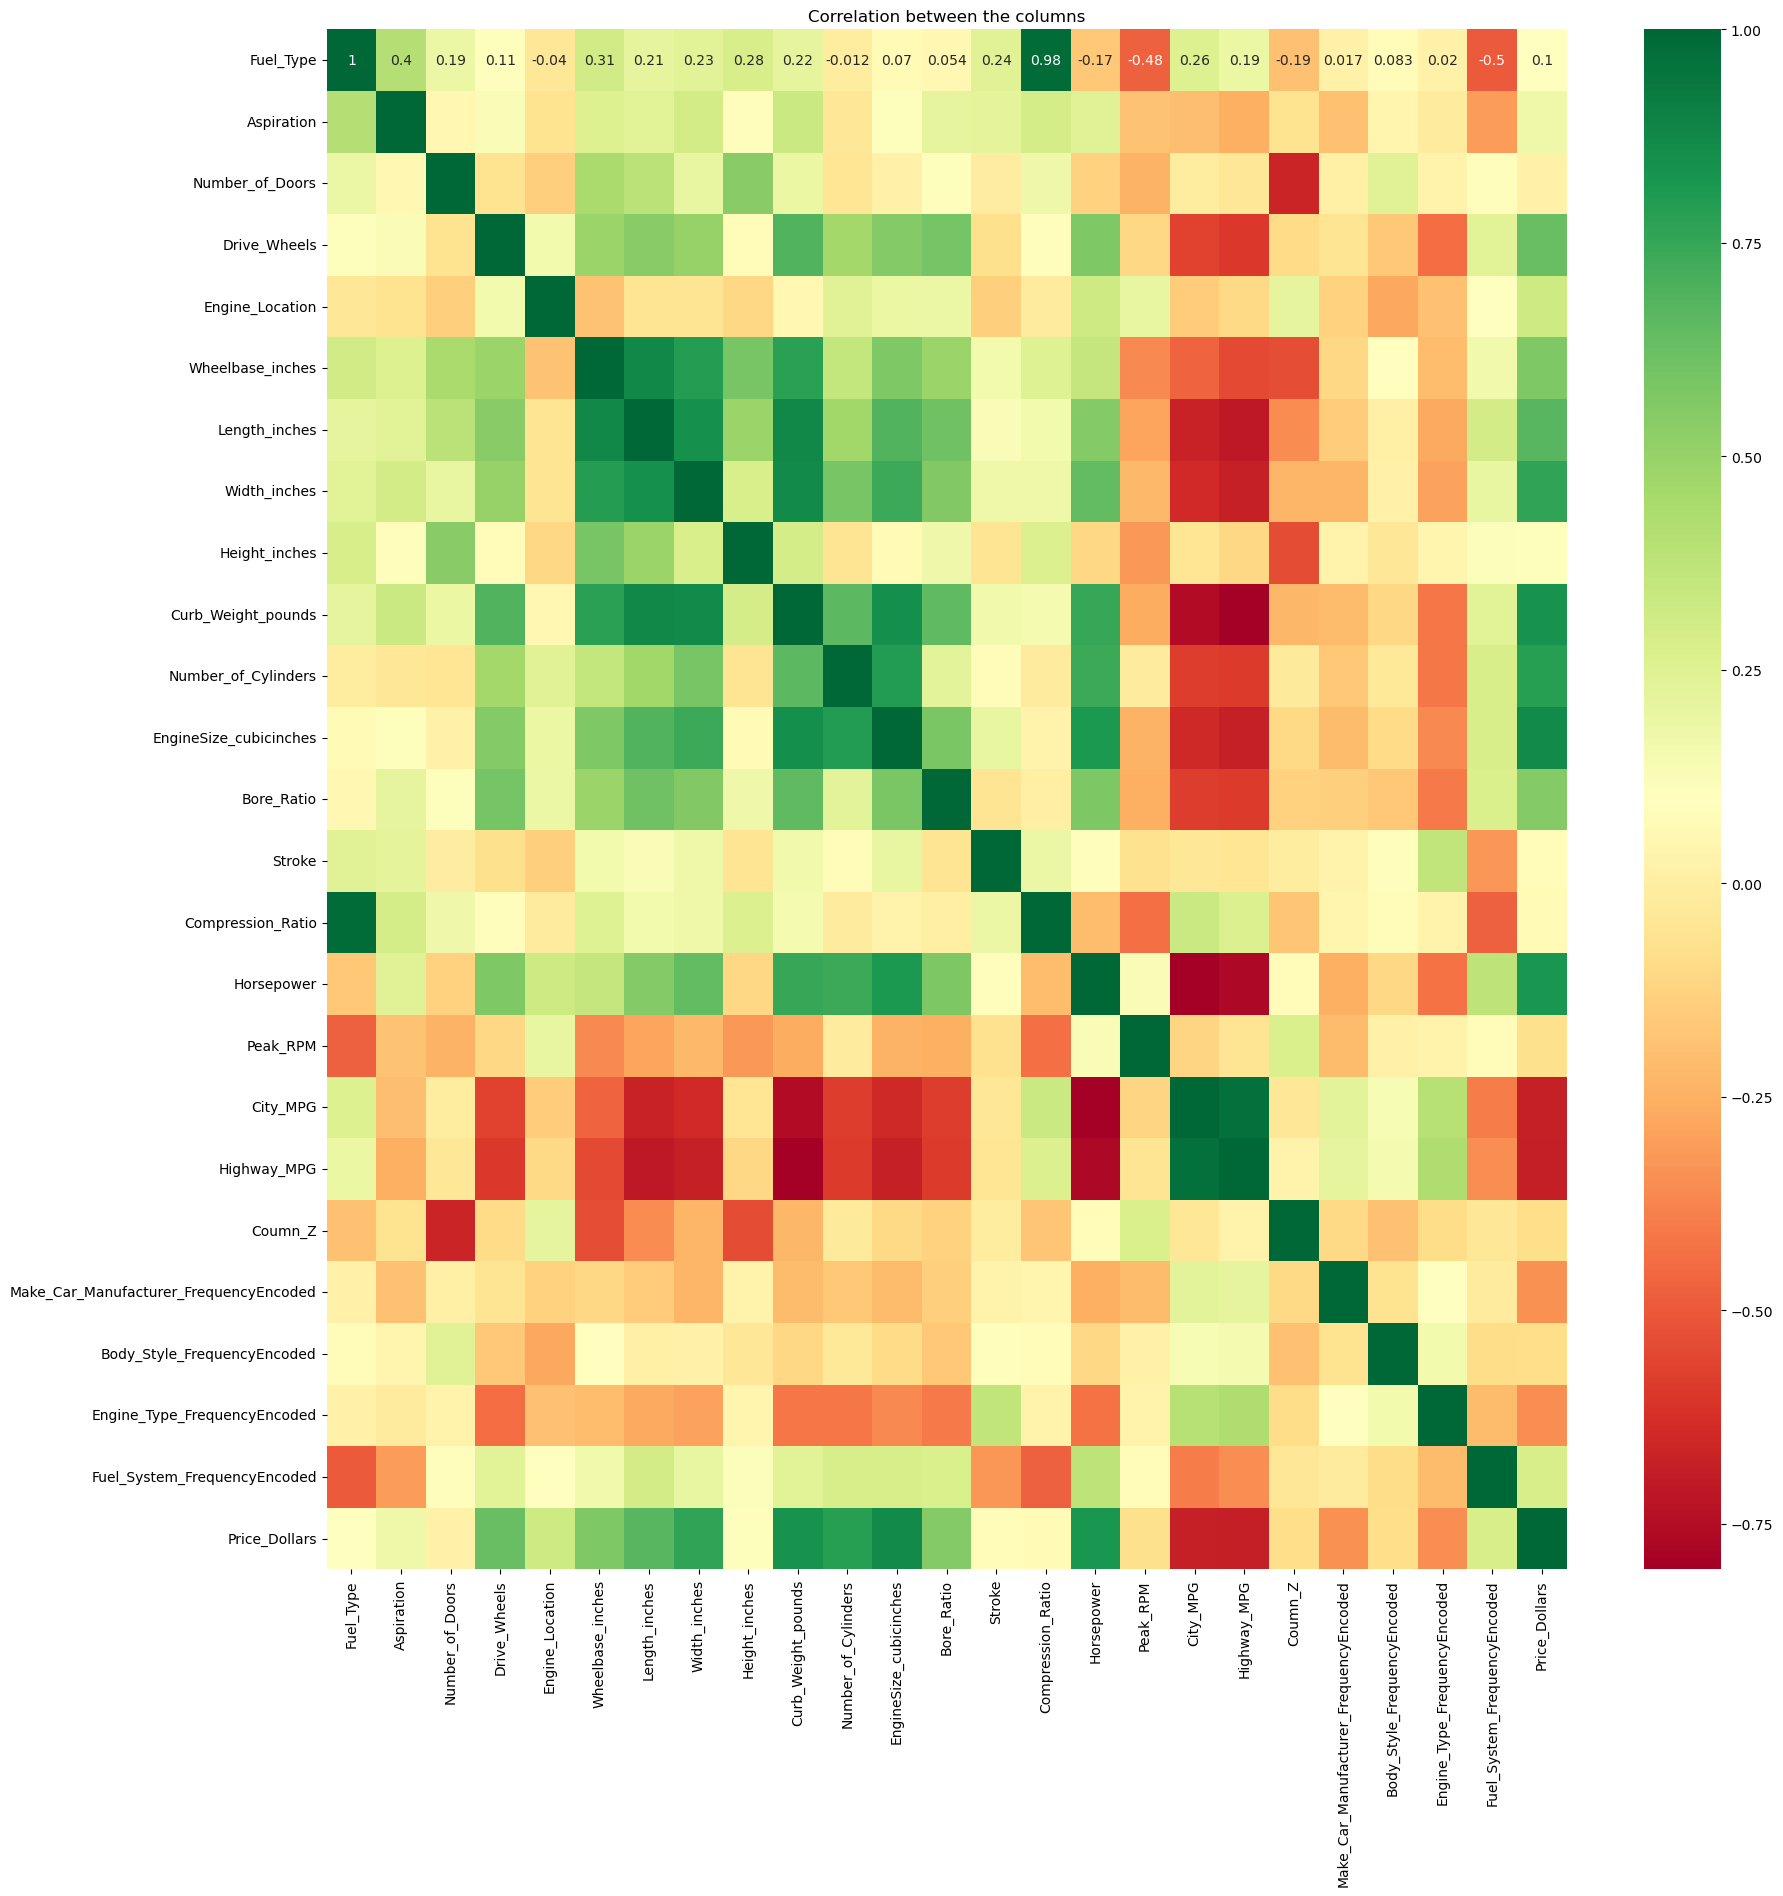

In [29]:
#Heatmap to check co-relation between the columns for Price of car.

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn")
plt.title('Correlation between the columns')
plt.show()

In [30]:
print(df.columns)

Index(['Fuel_Type', 'Aspiration', 'Number_of_Doors', 'Drive_Wheels',
       'Engine_Location', 'Wheelbase_inches', 'Length_inches', 'Width_inches',
       'Height_inches', 'Curb_Weight_pounds', 'Number_of_Cylinders',
       'EngineSize_cubicinches', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
       'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Coumn_Z',
       'Make_Car_Manufacturer_FrequencyEncoded', 'Body_Style_FrequencyEncoded',
       'Engine_Type_FrequencyEncoded', 'Fuel_System_FrequencyEncoded',
       'Price_Dollars'],
      dtype='object')



# Random Forest - Model 3


In [31]:
X=df.iloc[:,:-1] ## independent features

y=df.iloc[:,-1] ## dependent features

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [33]:
X.head()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,9.0,111.0,5000.0,21,27,3,3,6,12,94
1,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,9.0,111.0,5000.0,21,27,3,3,6,12,94
2,0,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,9.0,154.0,5000.0,19,26,1,3,70,13,94
3,0,0,1,0,0,99.8,176.6,66.2,54.3,2337,...,10.0,102.0,5500.0,24,30,2,7,96,148,94
4,0,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,8.0,115.0,5500.0,18,22,2,7,96,148,94


In [34]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: Price_Dollars, dtype: float64

In [35]:
print(model.feature_importances_)

[0.00111361 0.01745337 0.0021052  0.04935032 0.01031836 0.00998414
 0.01634607 0.05183829 0.00406935 0.12312642 0.22030095 0.18905839
 0.0231385  0.00584857 0.00389938 0.12449983 0.0104403  0.03289283
 0.05260534 0.00341506 0.03140191 0.00388106 0.00518002 0.00773274]


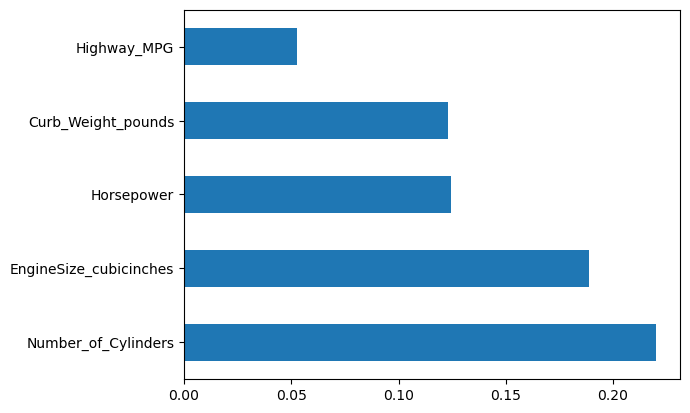

In [36]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train) #it will going to train the model (find the relation within training section)

RandomForestRegressor()

In [40]:
X_train

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
40,0,0,1,0,0,96.5,175.4,62.5,54.1,2372,...,9.0,86.0,5800.0,27,33,0,13,96,148,11
60,0,0,1,0,0,98.8,177.8,66.5,55.5,2410,...,8.6,84.0,4800.0,26,32,0,17,96,148,66
56,0,0,0,2,0,95.3,169.0,65.7,49.6,2380,...,9.4,101.0,6000.0,17,23,3,17,70,4,3
101,0,0,1,0,0,100.4,181.7,66.5,55.1,3095,...,9.0,152.0,5200.0,17,22,0,18,96,13,94
86,0,0,1,0,0,96.3,172.4,65.4,51.6,2405,...,8.5,88.0,5000.0,25,32,1,13,96,148,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,1,1,2,0,110.0,190.9,70.3,56.5,3515,...,21.5,123.0,4350.0,22,25,-1,8,96,148,20
192,1,1,1,0,0,100.4,180.2,66.9,55.1,2579,...,23.0,68.0,4500.0,33,38,0,12,96,148,20
117,0,1,1,2,0,108.0,186.7,68.3,56.0,3130,...,7.0,142.0,5600.0,18,24,0,11,96,12,94
47,0,0,1,2,0,113.0,199.6,69.6,52.8,4066,...,8.1,176.0,4750.0,15,19,0,3,96,12,94


In [41]:
X_test

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
52,0,0,0,0,0,93.1,159.1,64.2,54.1,1905,...,9.0,68.0,5000.0,31,38,1,17,70,148,66
181,0,0,1,2,0,104.5,187.8,66.5,54.1,3151,...,9.2,156.0,5200.0,19,24,-1,32,25,12,94
5,0,0,0,0,0,99.8,177.3,66.3,53.1,2507,...,8.5,110.0,5500.0,19,25,2,7,96,148,94
18,0,0,0,0,0,88.4,141.1,60.3,53.2,1488,...,9.5,48.0,5100.0,47,53,2,3,70,12,66
188,0,0,1,0,0,97.3,171.7,65.5,55.7,2300,...,10.0,100.0,5500.0,26,32,2,12,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,1,1,2,0,104.3,188.8,67.2,56.2,3045,...,7.5,162.0,5100.0,17,22,-2,11,96,148,94
143,0,0,1,0,0,97.2,172.0,65.4,52.5,2340,...,9.0,94.0,5200.0,26,32,0,12,96,15,94
24,0,0,1,0,0,93.7,157.3,63.8,50.6,1967,...,9.4,68.0,5500.0,31,38,1,9,70,148,66
30,0,0,0,0,0,86.6,144.6,63.9,50.8,1713,...,9.6,58.0,4800.0,49,54,2,13,70,148,11


In [42]:
y_train

40     10295.0
60      8495.0
56     11845.0
101    13499.0
86      8189.0
        ...   
67     25552.0
192    13845.0
117    18150.0
47     32250.0
172    17669.0
Name: Price_Dollars, Length: 143, dtype: float64

In [43]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
        ...   
198    18420.0
143     9960.0
24      6229.0
30      6479.0
135    15510.0
Name: Price_Dollars, Length: 62, dtype: float64

#### Model Evaluation

In [44]:
prediction=regressor.predict(X_test) #model is going to predect X_test # Evaluate on training data

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_10480\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_Dollars', ylabel='Density'>

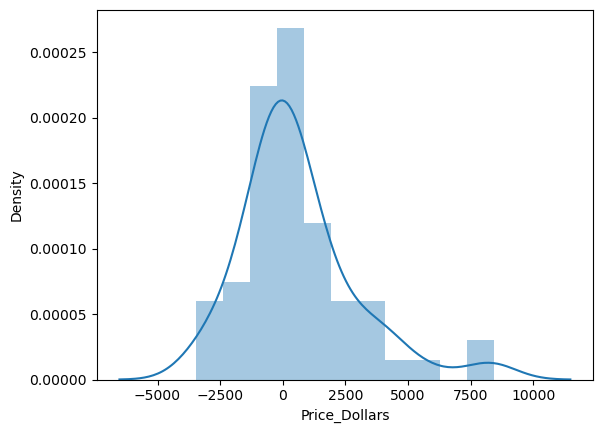

In [45]:
sns.distplot(y_test-prediction)

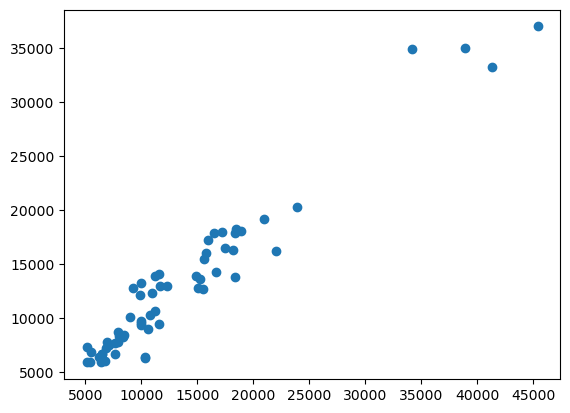

In [46]:
plt.scatter(y_test,prediction)

In [47]:
# Evaluate on train data

prediction_train=regressor.predict(X_train)


In [48]:
prediction_train

array([ 9680.845     ,  9343.18166667, 12274.16      , 14349.99      ,
        8171.16666667,  6162.99      , 10709.781     ,  7851.7       ,
        7120.79      ,  7950.65      ,  6030.07      ,  7335.8       ,
        7430.84      , 16919.68      ,  7421.87      , 13176.45      ,
        7844.23      , 15209.03      , 16904.684     , 21997.77      ,
        8493.74      , 14788.28      ,  8360.01      , 33157.51      ,
       11725.445     , 14564.46      , 17871.25      ,  8713.66      ,
        9343.18166667, 16241.74      ,  8980.58333333,  9854.12      ,
       13551.835     ,  7487.855     , 15439.37      , 13327.12      ,
       37745.32      , 15667.4       ,  7855.43      ,  5895.57      ,
        7904.84      , 12716.21      ,  7552.7       ,  5739.76      ,
        7702.55      , 18133.772     ,  5479.42      , 14868.83107143,
        7323.99      , 16919.68      ,  7714.8       , 10451.15333333,
        9565.58      , 12266.65      , 28605.41      , 35840.07      ,
      

## Testing results

In [49]:
prediction   #predected values of model)

array([ 6030.07      , 16034.67      , 13606.65866667,  5868.22      ,
        9674.93      , 13904.38      ,  5933.48      ,  7758.53      ,
       17918.508     ,  6614.42      , 19123.99666667, 35025.17      ,
       12274.16      , 13813.72      ,  6420.75      , 13196.79333333,
       12756.265     , 18003.374     ,  8725.41      ,  6668.7       ,
        9515.82      , 15407.065     , 12090.87      , 14034.34666667,
       17242.424     ,  7293.08      ,  7721.91      , 14207.6       ,
        8208.14      ,  6809.63      ,  8354.24      , 12961.737     ,
       16227.23533333, 10053.37333333,  7192.        , 33205.036     ,
        9391.49      , 16238.122     ,  5901.71      , 36977.72      ,
        6250.12      , 16500.37533333, 34904.23      , 12785.93      ,
       10643.1       ,  7703.41      ,  6637.45      , 13896.36      ,
       12957.35266667,  8439.21      , 20219.698     ,  7451.73      ,
        8356.06      ,  8980.58333333, 17858.322     , 17856.918     ,
      

In [50]:
y_test #origi al values.

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
        ...   
198    18420.0
143     9960.0
24      6229.0
30      6479.0
135    15510.0
Name: Price_Dollars, Length: 62, dtype: float64

In [51]:
df_eval = pd.DataFrame(regressor.predict(X_test), columns=['prediction'])
y_test1=y_test.reset_index(drop=True)
df_eval['original price'] = y_test1
df_eval

,prediction,original price
0,6030.070000,6795.0
1,16034.670000,15750.0
2,13606.658667,15250.0
3,5868.220000,5151.0
4,9674.930000,9995.0
...,...,...
57,18256.442571,18420.0
58,9292.486667,9960.0
59,6331.430000,6229.0
60,6001.490000,6479.0


In [52]:
df_eval1 = pd.DataFrame(regressor.predict(X_train), columns=['prediction_train'])
y_train1=y_train.reset_index(drop=True)
df_eval1['original price'] = y_train1
df_eval1

,prediction_train,original price
0,9680.845000,10295.0
1,9343.181667,8495.0
2,12274.160000,11845.0
3,14349.990000,13499.0
4,8171.166667,8189.0
...,...,...
138,26853.230000,25552.0
139,13305.460000,13845.0
140,18284.108000,18150.0
141,34155.210000,32250.0


In [53]:
df_eval.describe()

,prediction,original price
count,62.000000,62.000000
mean,12784.275192,13389.425484
std,7182.659339,8494.400549
min,5868.220000,5118.000000
25%,7708.035000,7895.750000
50%,11366.985000,10695.000000
75%,15877.768750,16376.750000
max,36977.720000,45400.000000


#### Train data
#### min difference in original price and Predected price is 3.399912%
#### and max difference in original price and Predected price is 602.815632%

## Testing results

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_train, prediction_train))
#print('MSE:', metrics.mean_squared_error(y_train, prediction_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, prediction_train)))

MAE: 624.5515407925407
RMSE: 870.8639879906532


In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
#print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1603.4455176651302
RMSE: 2386.152679639598


In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print(r2)

0.9197965887843915


In [58]:
r2 = r2_score(y_train, prediction_train)
print(r2)

0.987922952530661


#### Hyperparameter Tuning

In [59]:
rf1=RandomForestRegressor()

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [62]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [63]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [64]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()

In [65]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 5)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Harshal Malve\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Harshal Malve\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Harshal Malve\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Harshal Malve\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [68]:
rf_random.best_score_

-5892086.9242064655

In [69]:
predictions=rf_random.predict(X_test)

In [70]:
# Evaluate on train data

predictions_test=rf_random.predict(X_train)

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_10480\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_Dollars', ylabel='Density'>

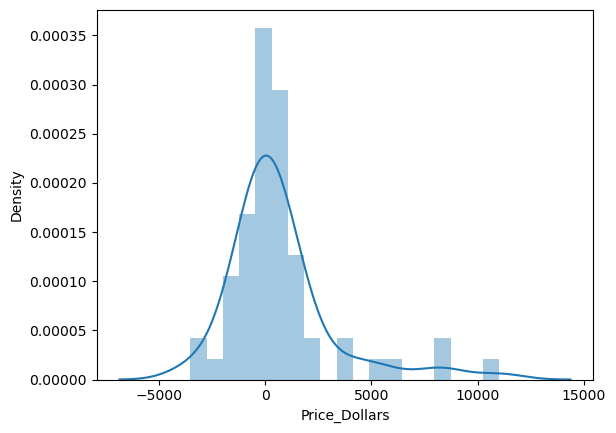

In [71]:
sns.distplot(y_test-predictions)

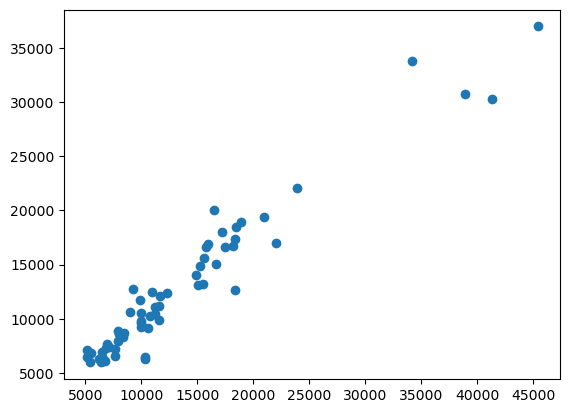

In [72]:
plt.scatter(y_test,predictions)

In [73]:
from sklearn import metrics

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1519.3812681399254
RMSE: 2614.7295912763934


In [75]:
r2 = r2_score(y_train, predictions_test)
print(r2)

0.9893205889750812


[X_tain, y_train] [X_test,y_test]

df_train = pd.concat([X_train, y_train], axis=1)

df_train

In [76]:
df_result = pd.concat([X,y,df_eval], axis=1)

In [77]:
df_result.head()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded,Price_Dollars,prediction,original price
0,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,21,27,3,3,6,12,94,13495.0,6030.070000,6795.0
1,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,21,27,3,3,6,12,94,16500.0,16034.670000,15750.0
2,0,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,19,26,1,3,70,13,94,16500.0,13606.658667,15250.0
3,0,0,1,0,0,99.8,176.6,66.2,54.3,2337,...,24,30,2,7,96,148,94,13950.0,5868.220000,5151.0
4,0,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,18,22,2,7,96,148,94,17450.0,9674.930000,9995.0


In [78]:
df_result.to_csv('my_dataframe1.csv', index=False) 